# Forces around cylindrical fibre

In [1]:
import numpy as np  # Import numpy
import fields       # Import fields.py
from astropy import units as u

## Material and geometry
A cylindrical nanofibre aligned with the $z$ axis can be modelled as a medium of radius $r_0$, characterized by its permittivity and permeability:

$
\varepsilon=\left\{\begin{array}{ll}
\varepsilon_1 \varepsilon_0, & \text { for } \rho<r_0 \\
\varepsilon_2 \varepsilon_0, & \text { for } \rho>r_0
\end{array} \quad \text { and } \quad \mu=\left\{\begin{array}{ll}
\mu_1 \mu_0, & \text { for } \rho<r_0 \\
\mu_2 \mu_0, & \text { for } \rho>r_0
\end{array}.\right.\right.
$

<p align="left">
  <img   width= 35% height=auto src="./figures/fibre.png">
</p>

Below you can set parameters that characterise the geometry and the material of the fibre:

In [2]:
ε1 = 4.3;       # [ε0] permittivity of silicon nitride at 20°C valid in λ0∈(750, 1700)nm [https://refractiveindex.info/?shelf=main&book=Si3N4&page=Vogt-2.13]
ε2 = 1.7;       # [ε0] permittivity of distilled water at 20°C valid in λ0∈(750, 1700)nm [https://refractiveindex.info/?shelf=main&book=H2O&page=Kedenburg]
fields.material(ε_in=ε1,ε_out=ε2,μ_in=1,μ_out=1) # Set the material parameters

λ0 = 1310e-9;   # [m] vacuum wavelength of the laser source
r0 = (λ0*fields.jn_zeros(0,1)[0])/(2*np.pi*fields.n1)  # [m] optimal radius of the fibre core

print("r0 = {:.2g} nm".format(r0*1e9))

r0 = 2.4e+02 nm


## Fields inside the fibre
Eigenmodes with $J_z = \ell W/ω$ and $p_z = (k_z)_{\ell,n} W/ω$ in a cylindrical fibre of given material and geometry can be labelled by two quantum numbers $\ell$ and mode number $n$. Below you can see dispersion relationships for the propagation constant $(k_z)_{\ell,n}$ for first few modes, note that the dashed black vertical line represents our choice of $k_0r_0$:

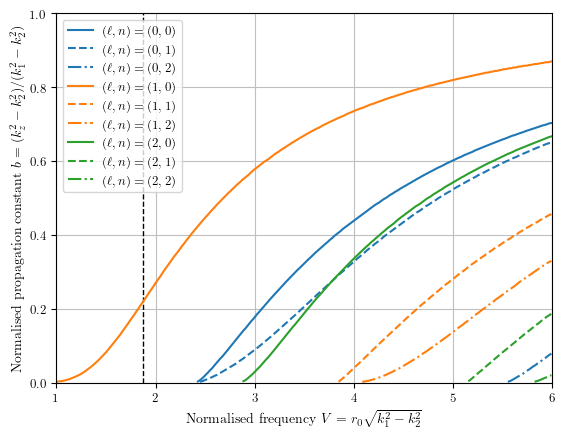

In [3]:
Vmin=1   # Minimum value of V=r0√(k₁²-k₂²)
Vmax=6   # Maximum value of V=r0√(k₁²-k₂²)           
# fields.plt_modes(r0,λ0,k0r0min=k0r0min,k0r0max=k0r0max,pdfs=True) # Plot the modes
fields.plt_modes(r0,λ0,Vmin,Vmax,rescale=True,pdfs=True) # Plot the modes

Now we will choose the fundamental mode $\ell=1$, $n=0$ but feel free to choose any other mode below. Note that if you choose a different mode you might have to tweak $k_0r_0$ too such that $(k_z)_{\ell,n}\neq0$, in other words the mode has to exist at that value.

In [4]:
ℓ    = 1       # azimuthal mode number related to the total angular momentum J_z = ℓW/ω
mode = 0       # mode number n such that the spin angular momentum in the high radius limit k₀r₀≫1 is S_z = (-)ⁿW/ω and there is nᵣ=n/2-(1-(-1)ⁿ)/4 radial nodes in the energy density

All there is left now is to decide which basis we want to plot our force densities and some styling:

In [5]:
# basis  = 'e-m-c'     # basis for the force densities [pauli, e-m-c]
basis  = 'pauli'     # basis for the force densities [pauli, e-m-c]
inside = False       # count the force densities inside the cylinder 
pdfs   = True       # save pdfs of the force densities 
res    = int(450)    # resolution of the plot 
window = 1.5*r0/λ0   # size of the window around the cylinder 
arrows = 8;          # number of arrows in the plot 
w = 3                # scale factor for the arrows 
z = 0

### Right mode
We plot the $\boldsymbol{E}$ and $\boldsymbol{H}$ eigenfields with ($J_z = \ell W/ω$ and $p_z = (k_z)_{\ell,n} W/ω$). This will be the fundamental right eigenmode if $n=0$, $\ell=+1$.

In [6]:
pdfname='circular'  # name of the pdf file
# (ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,R=1,L=0,resolution=res,window=window,ℓ=ℓ,mode=mode)    # get the fields
(ϵ,E1,μ,H1,X,Y,Z)=fields.get(r0,λ0,R=1,L=0,resolution=res,window=window,ℓ=ℓ,mode=mode,z=z)    # get the fields
(ϵ,E2,μ,H2,X,Y,Z)=fields.get(r0,λ0,R=0,L=1,resolution=res,window=window,ℓ=ℓ,mode=mode,sgnkz=-1,z=z)    # get the fields
# dx=np.diff(X[:,0,0])[0]
# dy=np.diff(Y[0,:,0])[0]
# Power1=fields.calculate_power(E1,H1,dx,dy)
# Power2=fields.calculate_power(E2,H2,dx,dy)
# Power=Power1+Power2
E=np.asarray(E1)+np.asarray(E2)
H=np.asarray(H1)+np.asarray(H2)

Next we plot the corresponding force densities that make up the force:
<!-- $$  
\begin{aligned}
    {\boldsymbol{F}}={}&\underbrace{\boldsymbol\nabla(\Re\alpha_\text{e}W_\text{e}+\Re\alpha_\text{m}W_\text{m}+\Re\alpha_\text{c}\Re{W_\text{c}}+\Re\alpha_\text{t}\Im{W_\text{c}})}_\text{gradient force}\\
    &\underbrace{+2\omega(\Im\alpha_\text{e}\boldsymbol{p}_\text{e}+\Im\alpha_\text{m}\boldsymbol{p}_\text{m}+\Im\alpha_\text{c}\Re\boldsymbol{p}_\text{c}+\Im\alpha_\text{t}\Im\boldsymbol{p}_\text{c})}_\text{radiation pressure force}\\
    &\underbrace{-[\omega\left(\gamma^\text{e}_\text{rec} \boldsymbol{S}_\text{e}+\gamma^\text{m}_\text{rec} \boldsymbol{S}_\text{m}\right)+(\sigma_\text{rec}\Re\boldsymbol{\Pi}+\sigma_{\text{im}}\Im\boldsymbol\Pi)/c
    ]}_\text{dipole recoil force},
\end{aligned}
$$ -->
$$
\boldsymbol{F}=\sum_{A=0}^3(\Re{\alpha}_A\boldsymbol\nabla W_A+2\omega\Im{\alpha}_A\boldsymbol{p}_A-k{\beta}_A\omega\boldsymbol{S}_A),
$$
each group of forces is represented by one row, while columns represent individual components.

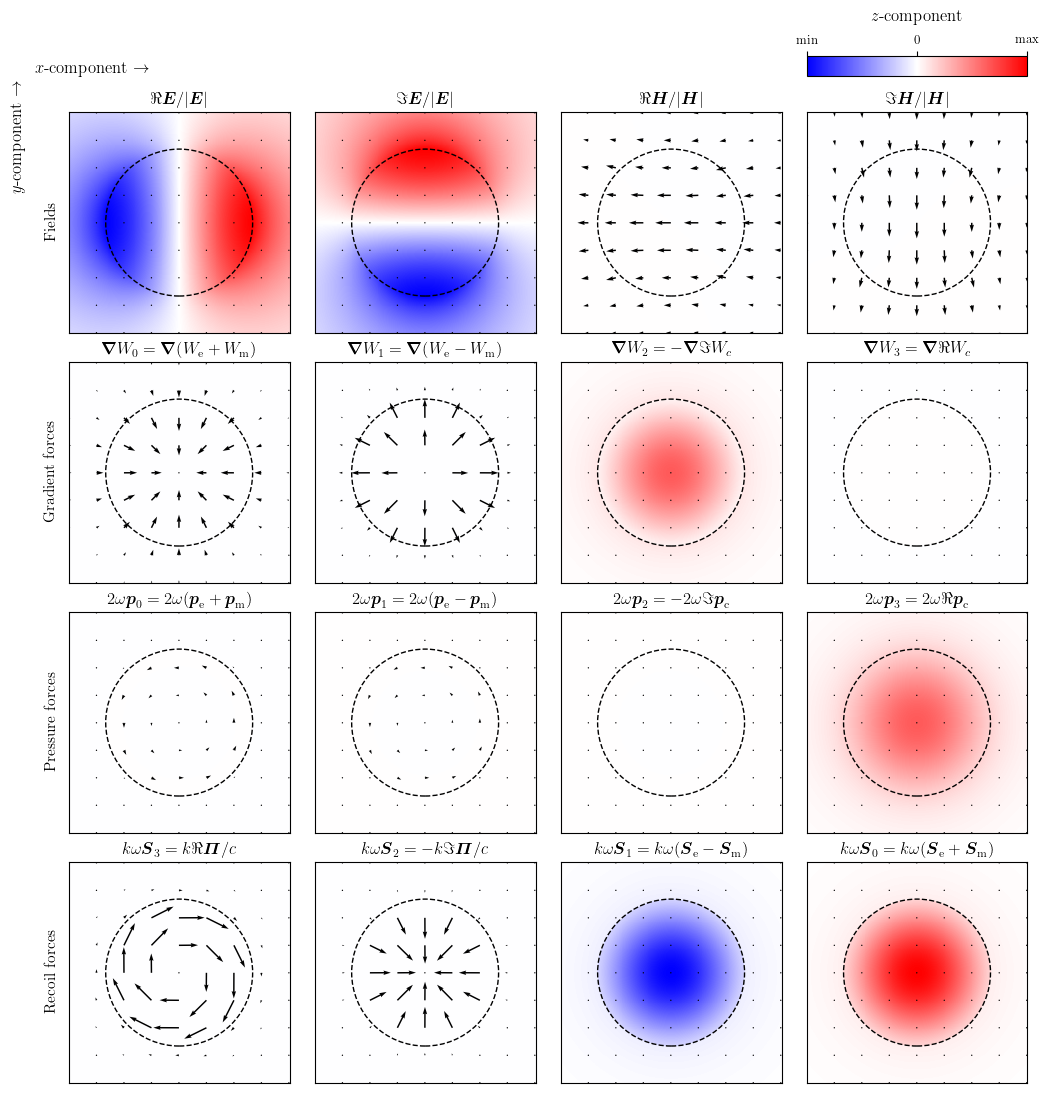

In [7]:
fields.plot_forces(r0,λ0,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis=basis,pdfs=pdfs,pdfname=pdfname,plot_fields=True)   # plot the force densities

In [8]:
# CP=fields.plot_max_forces(λ0,r0,R=1,L=0,k0r0min=Vmin/fields.NA,k0r0max=Vmax/fields.NA,samples=50,resolution=res/4,ℓ=ℓ,mode=mode,zix=1,inside=inside,basis=basis,out=True) # generate maximum force densities

### Quasi-TE mode
We plot the linear combination of two eigenmodes with opposite angular momentum $\boldsymbol{E}^{n,\ell}_{\text{TE}}=\mathrm{i}(\boldsymbol{E}_{n,\ell}-\boldsymbol{E}_{n,-\ell})$ and same for $\boldsymbol{H}$. This will be the quasi-TE in the case that it is constructed from the fundamental eigenmode where $\ell=1$ and $n=0$.

In [9]:
pdfname="linear"    # name of the pdf file
# (ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,R=1j,L=-1j,resolution=res,window=window,ℓ=ℓ,mode=mode)     # get the fields
(ϵ,E1,μ,H1,X,Y,Z)=fields.get(r0,λ0,R=1j,L=-1j,resolution=res,window=window,ℓ=ℓ,mode=mode,z=z)    # get the fields
(ϵ,E2,μ,H2,X,Y,Z)=fields.get(r0,λ0,R=1,L=1,resolution=res,window=window,ℓ=ℓ,mode=mode,sgnkz=-1,z=z)    # get the fields
E=np.asarray(E1)+np.asarray(E2)
H=np.asarray(H1)+np.asarray(H2)

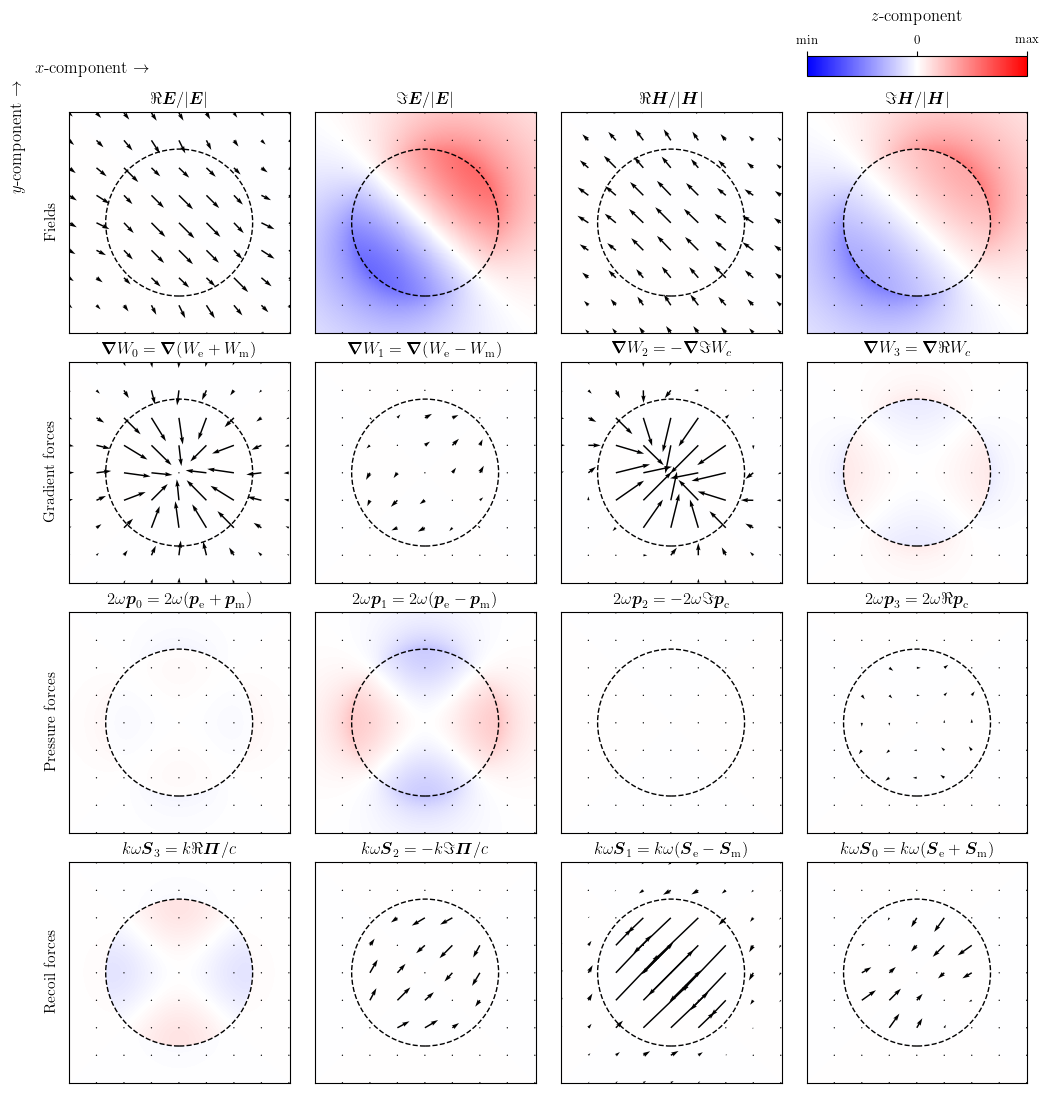

In [10]:
fields.plot_forces(r0,λ0,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis=basis,pdfs=pdfs,pdfname=pdfname,plot_fields=True)   # plot the force densities

In [11]:
# LP=fields.plot_max_forces(λ0,r0,R=1j,L=-1j,k0r0min=Vmin/fields.NA,k0r0max=Vmax/fields.NA,samples=50,resolution=res/4,ℓ=ℓ,mode=mode,zix=1,inside=inside,basis=basis,out=True) # generate maximum force densities

In [12]:
# fields.radius_figure(CP,LP,low=4,high=6,pdfs=True) # plot the radius of the force densities

In [13]:
(_,n,V)=fields.get_neff(rmin=0,rmax=2,N=500,r0_over_λ0=r0/λ0,neff_fig=False,ℓ=-ℓ,mode=mode)
print("n = {:.2g}".format(n))

n = 1.5


In [14]:
print("1/2n = {:.2g}".format(1/(2*n)))

1/2n = 0.33


In [15]:
print("λ0/3 = {:.3g} nm".format(λ0/3*1e9))

λ0/3 = 437 nm


In [16]:
a  = .3*u.um   # particle radius
r0 = r0*u.m   # fibre radius
λ0 = λ0*u.m   # vacuum wavelength
# calculate polarisabilities from particle properties
εp = 2.5 + 0j     # particle permittivity
μp = 1 + 0j     # particle permeability
κp = 0.5 + 0j   # particle chirality
(αe,αm,αc)=fields.get_α(λ0,a.to(u.m),εp,μp,κp)

unit=u.Angstrom**3 # unit of the polarisabilities

print("r0 = ",f"{r0:.3g}", "or", f"{r0/λ0:.3g} λ0")
print("a  = ",f"{a:.3g}", "or", f"{a/λ0:.3g} λ0")
print("αe = ", f"{(αe.to(unit)).value:+.3g} {(αe.to(unit)).unit:unicode}")
print("αm = ", f"{(αm.to(unit)).value:+.3g} {(αm.to(unit)).unit:unicode}")
print("αc = ", f"{(αc.to(unit)).value:+.3g} {(αc.to(unit)).unit:unicode}")
λ0 = λ0.to(u.m).value; r0 = r0.to(u.m).value; a = a.to(u.m).value; α = (αe.to(u.m**3).value,αm.to(u.m**3).value,αc.to(u.m**3).value)

r0 =  2.42e-07 m or 0.185 λ0
a  =  0.3 um or 2.29e+05 um / m λ0
αe =  +3.45e+10+2.44e+09j Å³
αm =  +5.14e+08-1.14e+10j Å³
αc =  +2.12e+10+8.65e+09j Å³


Right: 	Fa⊥ = 121 [fN/mW] 	 Fc⊥ = 0.0801 [fN/mW] 	 Fa∥ = 0.68 [fN/mW] 	 Fc∥ = 147 [fN/mW]
Right: 	FL⊥ = 121 [fN/mW] 	 FR⊥ = 120 [fN/mW] 	 FL∥ = 148 [fN/mW] 	 FR∥ = 147 [fN/mW]
Top: 	Fa⊥ = 121 [fN/mW] 	 Fc⊥ = 0.0801 [fN/mW] 	 Fa∥ = 0.68 [fN/mW] 	 Fc∥ = 147 [fN/mW]
Top: 	FL⊥ = 121 [fN/mW] 	 FR⊥ = 120 [fN/mW] 	 FL∥ = 148 [fN/mW] 	 FR∥ = 147 [fN/mW]


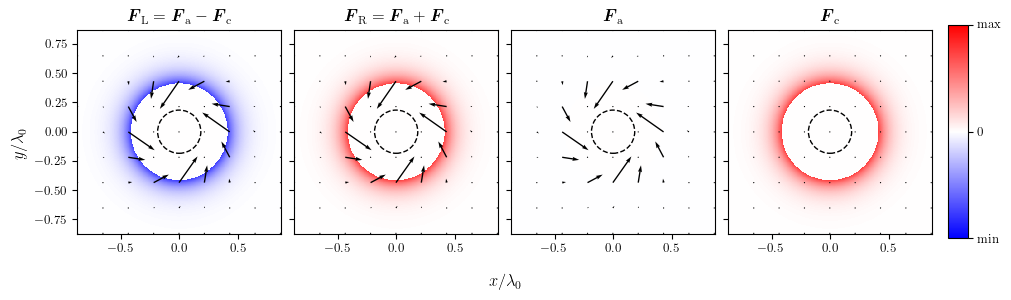

In [17]:
window=2.1*(r0+a)/λ0    # size of the window around the cylinder

# (ϵ,E,μ,H,X,Y,Z)=fields.get(r0,λ0,R=1j,L=-1j,resolution=res,window=window,ℓ=ℓ,mode=mode) 
(ϵ,E1,μ,H1,X,Y,Z)=fields.get(r0,λ0,R=1,L=0,resolution=res,window=window,ℓ=ℓ,mode=mode)    # get the fields
(ϵ,E2,μ,H2,X,Y,Z)=fields.get(r0,λ0,R=0,L=1,resolution=res,window=window,ℓ=ℓ,mode=mode,sgnkz=-1)    # get the fields
dx=np.diff(X[:,0,0])[0]
dy=np.diff(Y[0,:,0])[0]
Power1=fields.calculate_power(E1,H1,dx,dy)
Power2=fields.calculate_power(E2,H2,dx,dy)
Power=Power1-Power2
E=np.asarray(E1)+np.asarray(E2)
H=np.asarray(H1)+np.asarray(H2)
fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='enantiomer',Power=Power)
# fields.plot_force_per_enantiomer(r0,λ0,α,a,ϵ,μ,E,H,X,Y,Z,zix=1,w=w,arrows=arrows,basis='e-m-c')